### Quiz 3. tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 정답은 없습니다. 자유롭게 분석해보세요. 
- size는 식사 인원인것 같네요.
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)
- 지금까지 배운내용안에서 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.
- 적당한 그래프를 그려주시면 더 좋습니다.
- 반별로 제가 판단해서 가장 잘하신 과제는 다른 분들께 공유하며 제가 스타벅스 커피 삽니다.^^

In [1]:
tips = sns.load_dataset("tips")  
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 가설
1. total_bill 이 높을 수록 팁을 많이 줄 것이다.
2. size 가 높을수록 팁을 많이 줄 것이다.
3. Lunch 보다는 Dinner가 많이 줄 것이다.


## 분석 과정 설정

- 전체 데이터와 함께 팁 액수에 따른 구간별 그룹을 설정하여 분석한다.
    - 평균 tip = 3 
    - (3 미만, 3이상 5 이하, 5 초과)

#### 초기 세팅

In [2]:
def rounder(number):
    if number %10 > 4:
        number = number//10 * 10 + 5
    else:
        number = number//10 * 10
    return int(number)

In [3]:
tips["count"] = 1
total_bill = tips["total_bill"] 
tip = tips["tip"]
tips['a_total'] = tips["total_bill"].apply(rounder)

#### 구간별 그룹 설정

In [4]:
tips_lower= tips[tips["tip"]<3].reset_index()

In [5]:
tips_upper3= tips[tips["tip"]>=3]
tips_upper3= tips_upper3[tips_upper3["tip"]<5].reset_index()

In [6]:
tips_upper5= tips[tips["tip"]>5].reset_index()

In [7]:
mean_tip, median_tip = round(tips['tip'].mean(), 2), tips['tip'].median()
print("total [mean: {}, median: {}]".format(mean_tip, median_tip))

mean_tip3, median_tip3 = round(tips_upper3['tip'].mean(), 2), tips_upper3['tip'].median()
print("upper 3 [mean: {}, median: {}]".format(mean_tip3, median_tip3))

mean_tip5, median_tip5 = round(tips_upper5['tip'].mean(), 2), tips_upper5['tip'].median()
print("upper 5 [mean: {}, median: {}]".format(mean_tip5, median_tip5))

total [mean: 3.0, median: 2.9]
upper 3 [mean: 3.5, median: 3.48]
upper 5 [mean: 6.27, median: 5.885]


---

## 가설1. total_bill이 클수록 tip이 증가할 것이다.

In [8]:
to = tips.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to3 = tips_upper3.pivot_table(index="total_bill", values="tip", columns="count", aggfunc='mean')
to5 = tips_upper5.pivot_table(index="total_bill", values="tip", columns="count", aggfunc='mean')
to_lower = tips_lower.pivot_table(index="total_bill", values="tip", columns="count", aggfunc='mean')

In [9]:
%matplotlib inline

In [10]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("muted", 4)

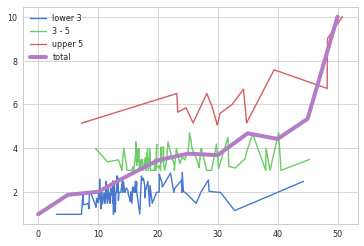

In [11]:
plt.plot(to_lower, label = 'lower 3')
plt.plot(to3, label= '3 - 5')
plt.plot(to5, label = 'upper 5')
plt.plot(to, lw=4,label= 'total')
plt.legend(loc=0)
plt.show()

### a_total : total_bill 을 길이 5의 구간으로 나눔

In [12]:
to = tips.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to3 = tips_upper3.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to5 = tips_upper5.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')
to_lower = tips_lower.pivot_table(index="a_total", values="tip", columns="count", aggfunc='mean')

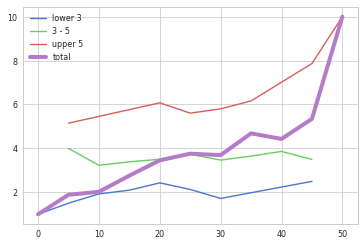

In [13]:
plt.plot(to_lower, label = 'lower 3')
plt.plot(to3, label= '3 - 5')
plt.plot(to5, label = 'upper 5')
plt.plot(to, lw= '4',label= 'total')
plt.legend(loc=0)
plt.show()

#### 가설 1 검증:
- 5 달러 이하의 팁을 낸 사람들은 total_bill과 tip간의 관계가 나타나지 않는다.
- 다만, 5달러 초과의 팁을 낸 사람들은 total_bill이 증가할 수록 팁을 더 내는 경향이 보인다.

--> 원래 많이 내는 놈만 많이 낸다


## 가설 2. size가 커질수록 팁이 증가한다.
- size와 (tip의 평균값)이 비례

In [14]:
s_to = tips.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')
s_3 = tips_upper3.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')
s_5 = tips_upper5.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')
s_lo = tips_lower.pivot_table(index="size", values="tip", columns='count', aggfunc='mean')

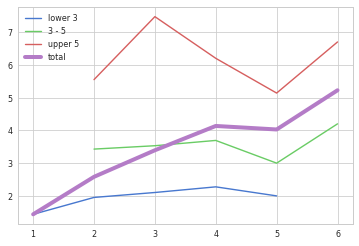

In [15]:
plt.plot(s_lo, label = 'lower 3')
plt.plot(s_3, label= '3 - 5')
plt.plot(s_5, label = 'upper 5')
plt.plot(s_to, lw='4',label= 'total')
plt.legend(loc=0)
plt.show()

#### 가설 2 검증:
- 전체값이 가설1의 전체값과 비슷한 양상을 띄고 있다.
- 구간별 그룹간의 차이를 분석하기에는 데이터 구간이 좁다.

### 가설 1& 2 의 상관 예상
- 사람수가 많으면 많이 먹는다...
- 따라서 size와 total_bill은 같은 방향의 feature

In [16]:
ts_t= tips.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')
ts_l=tips_lower.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')
ts_3=tips_upper3.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')
ts_5=tips_upper5.pivot_table(index="total_bill", values="size", columns="count", aggfunc='mean')

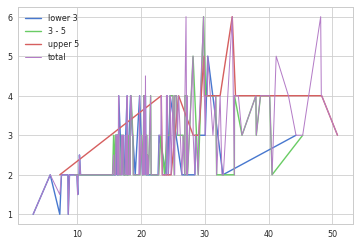

In [17]:
plt.plot(ts_l, label = 'lower 3')
plt.plot(ts_3, label= '3 - 5')
plt.plot(ts_5, label = 'upper 5')
plt.plot(ts_t, lw='1',label= 'total')
plt.legend(loc=0)
plt.show()

분포값이 너무 다양해 a_total로 구간을 나누었다

In [18]:
ts_t= tips.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')
ts_l=tips_lower.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')
ts_3=tips_upper3.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')
ts_5=tips_upper5.pivot_table(index="a_total", values="size", columns="count", aggfunc='mean')

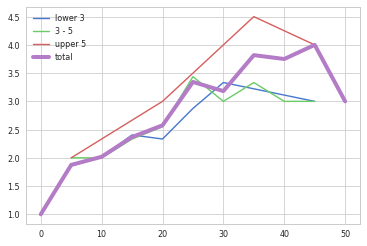

In [19]:
plt.plot(ts_l, label = 'lower 3')
plt.plot(ts_3, label= '3 - 5')
plt.plot(ts_5, label = 'upper 5')
plt.plot(ts_t, lw='4',label= 'total')
plt.legend(loc=0)
plt.show()

#### - 가설 1(total_bill)과 2(size)의 값은 서로 양의 상관을 가진다.
- 일정 수치(그룹마다 상이)를 지나면 음의 상관으로 바뀐다.
    - 머릿수에 따라 총 음식값이 증가하지만 일정 수준 이후에는 감소
    
    
## 1&2 분석
- 테이블의 사람이 많을 수록 음식 값이 많이 나온다.
- 총 음식 값과 인원 수는 팁과는 큰 연관이 없다.

## 가설3. Lunch < Dinner

In [20]:
time_t = tips.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')
time_l = tips_lower.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')
time_3 = tips_upper3.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')
time_5 = tips_upper5.pivot_table(index="time", values="tip", columns='count', aggfunc='mean')

In [21]:
data = {
   'lower 3': time_l[1],
   'upper 3': time_3[1],
   'upper 5':time_5[1],
    }  
result = pd.DataFrame(data)
result['total'] = time_t[1]

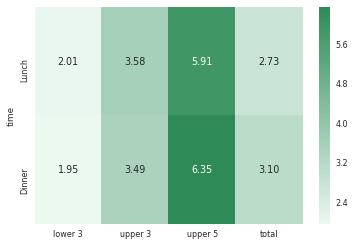

In [22]:
sns.heatmap(result, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, fmt=".2f")
plt.show()

가설 3 검증:
- 팁을 많이 주는 그룹을 제외하고는, 점심과 저녁의 차이가 뚜렷하지 않다.

# 가설 재수립
1. 성별
1. 흡연여부
1. 요일

## 2 - 1. 성별
- 마찬가지로 그룹별 분석
- 결과값이 뚜렷하게 나타나지 않아 log와 exp로 조정

In [23]:
sex_t = tips.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')
sex_l = tips_lower.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')
sex_3 = tips_upper3.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')
sex_5 = tips_upper5.pivot_table(index="sex", values="tip", columns='count', aggfunc='mean')

In [24]:
data = {
   'lower 3': sex_l[1],
   'upper 3': sex_3[1],
   'upper 5':sex_5[1],
    }  
sex_result = pd.DataFrame(data)
sex_result['total'] = sex_t[1]
sex_result

,lower 3,upper 3,upper 5,total
sex,,,,
Male,1.954267,3.509516,6.493571,3.089618
Female,2.003958,3.493871,5.502500,2.833448


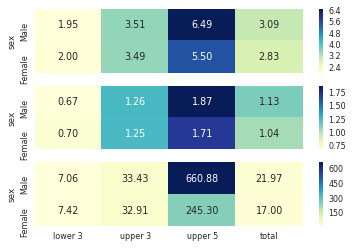

In [25]:
plt.subplot(311)
sns.heatmap((sex_result), xticklabels=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(312)
sns.heatmap(np.log(sex_result), xticklabels=False ,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(313)
sns.heatmap(np.exp(sex_result), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

### 가설 2-1 검증:
- upper 5 그룹을 제외하고는 남여간의 팁 차이는 뚜렷하게 나타나지 않는다.
- upper 5 그룹에서는 남성이 팁을 다소 더 주는 경향이 있다. 

## 2 - 2. 흡연
- 성별 분석과 동일

In [26]:
smoker_t = tips.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')
smoker_l = tips_lower.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')
smoker_3 = tips_upper3.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')
smoker_5 = tips_upper5.pivot_table(index="smoker", values="tip", columns='count', aggfunc='mean')

In [27]:
data = {
   'lower 3': smoker_l[1],
   'upper 3': smoker_3[1],
   'upper 5':smoker_5[1],
    }  
smoke_result = pd.DataFrame(data)
smoke_result['total'] = smoker_t[1]
smoke_result

,lower 3,upper 3,upper 5,total
smoker,,,,
Yes,1.912093,3.503171,6.493333,3.008710
No,2.006750,3.505192,6.163333,2.991854


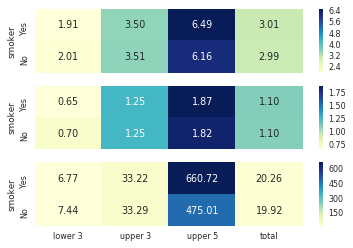

In [28]:
plt.subplot(311)
sns.heatmap((smoke_result), xticklabels=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(312)
sns.heatmap(np.log(smoke_result), xticklabels=False ,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(313)
sns.heatmap(np.exp(smoke_result), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

### 가설 2 - 2 검증:
- 가설 2 - 1 과 유사하다

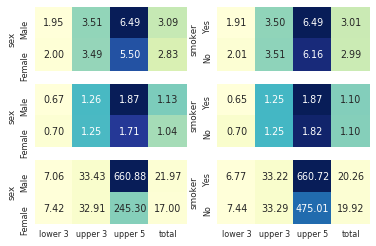

In [29]:
#가설 2-1
plt.subplot(321)
sns.heatmap((sex_result), xticklabels=False, cbar=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(323)
sns.heatmap(np.log(sex_result), xticklabels=False ,cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(325)
sns.heatmap(np.exp(sex_result), cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")
#가설 2-2
plt.subplot(322)
sns.heatmap((smoke_result), xticklabels=False,cbar=False, cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(324)
sns.heatmap(np.log(smoke_result), xticklabels=False ,cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")
plt.subplot(326)
sns.heatmap(np.exp(smoke_result), cbar=False,cmap='YlGnBu', annot=True, fmt=".2f")


plt.show()

### 가설 2-1 & 2-2
실제로 성별 결과와 흡연 결과의 큰 차이가 없어 보인다.

## 가설 2 - 3. 요일

In [30]:
day_t = tips.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')
day_3 = tips_upper3.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')
day_5 = tips_upper5.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')
day_l = tips_lower.pivot_table(index="day", values="tip", columns="count", aggfunc='mean')

In [31]:
data = {
   'lower 3': day_l[1],
   'upper 3': day_3[1],
   'upper 5':day_5[1],
    }  
day_result = pd.DataFrame(data)
day_result['total'] = day_t[1]
day_result

,lower 3,upper 3,upper 5,total
day,,,,
Thur,2.008500,3.584667,5.906667,2.771452
Fri,1.855556,3.526000,NaN,2.734737
Sat,1.931778,3.411515,7.270000,2.993103
Sun,2.027241,3.551143,5.538750,3.255132


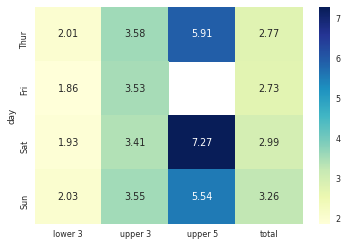

In [32]:
sns.heatmap((day_result), cmap='YlGnBu', annot=True, fmt=".2f")
plt.show()

###  가설 2-3 검증:
- 요일간의 차이가 미미하다.

---

## 가설 3. upper 5 그룹의 특징이 있을 것이다.

In [33]:
tips_upper5

,index,total_bill,tip,sex,smoker,day,time,size,count,a_total
0,23,39.42,7.58,Male,No,Sat,Dinner,4,1,35
1,44,30.40,5.60,Male,No,Sun,Dinner,4,1,30
2,47,32.40,6.00,Male,No,Sun,Dinner,4,1,30
3,52,34.81,5.20,Female,No,Sun,Dinner,4,1,35
4,59,48.27,6.73,Male,No,Sat,Dinner,4,1,45
5,85,34.83,5.17,Female,No,Thur,Lunch,4,1,35
6,88,24.71,5.85,Male,No,Thur,Lunch,2,1,25
7,116,29.93,5.07,Male,No,Sun,Dinner,4,1,25
8,141,34.30,6.70,Male,No,Thur,Lunch,6,1,35
9,155,29.85,5.14,Female,No,Sun,Dinner,5,1,25


### 3 - 1. 흡연 특징

In [34]:
tips_upper5['smoker2'] = tips_upper5['smoker'].apply(lambda x: 0 if len(x) == 2 else 1)

In [35]:
sr = tips_upper5.pivot_table(index="smoker2", values = 'count', columns='smoker', aggfunc=np.sum )
sr

smoker,Yes,No
smoker2,,
1,6.0,NaN
0,NaN,12.0


In [36]:
tips['smoker2'] = tips['smoker'].apply(lambda x: 0 if len(x) == 2 else 1)

In [37]:
srt = tips.pivot_table(index="smoker2", values = 'count', columns='smoker', aggfunc=np.sum )
srt

smoker,Yes,No
smoker2,,
1,93.0,NaN
0,NaN,151.0


In [38]:
smoke_rate_t = round(srt.iloc[0,0]/(srt.iloc[0,0] + srt.iloc[1,1]) * 100, 12)
smoke_rate_5 =round(sr.iloc[0,0]/(sr.iloc[0,0] + sr.iloc[1,1]) * 100, 12)
smoke_rate_t, smoke_rate_5

(38.114754098360997, 33.333333333333002)

In [39]:
round(sr.iloc[1,1]/srt.iloc[1,1]*100,2), round(sr.iloc[0,0]/srt.iloc[0,0]*100, 2)

(7.9500000000000002, 6.4500000000000002)

### 가설 3 - 검증1. 
- 전체 흡연율에 비해 팁을 많이 주는 그룹의 흡연율이 5%p 낮다.
- 비흡연자 고객이 upper_5그룹일 확률 12/151, 7.95%
- 흡연자 고객이 upper_5그룹일 확률 6/93, 6.45%


## 비흡연자 고객에게 팁을 많이 받을 확률이 1.5%p 더 높다.

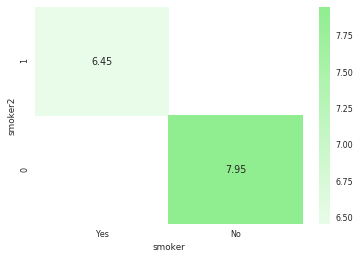

In [40]:
sns.heatmap(sr/srt*100, cmap=sns.light_palette("lightgreen", as_cmap=True), annot=True, fmt=".2f")
plt.show()

---

### 3 - 2. 시간 특징

In [41]:
tips_upper5['time2'] = tips_upper5['time'].apply(lambda x: 0 if len(x) == 5 else 1)

In [42]:
LD = tips_upper5.pivot_table(index="time2", values = 'count', columns='time', aggfunc=np.sum )
LD

time,Lunch,Dinner
time2,,
0,3.0,NaN
1,NaN,15.0


In [43]:
tips['time2'] = tips['time'].apply(lambda x: 0 if len(x) == 5 else 1)

In [44]:
LDt = tips.pivot_table(index="time2", values = 'count', columns='time', aggfunc=np.sum )
LDt

time,Lunch,Dinner
time2,,
0,68.0,NaN
1,NaN,176.0


In [45]:
LD_rate_t = round(LDt.iloc[0,0]/(LDt.iloc[0,0] + LDt.iloc[1,1]) * 100, 12)
LD_rate_5 =round(LD.iloc[0,0]/(LD.iloc[0,0] + LD.iloc[1,1]) * 100, 12)
LD_rate_t, LD_rate_5

(27.868852459016001, 16.666666666666998)

In [46]:
round(LD.iloc[1,1]/LDt.iloc[1,1]*100,2), round(LD.iloc[0,0]/LDt.iloc[0,0]*100, 2)

(8.5199999999999996, 4.4100000000000001)

### 가설 3 - 검증2. 
- 점심시간에 비해 저녁시간에 upper_5그룹이 올 확률이 높다.
- Dinner에 온 고객이 upper_5그룹일 확률 8.51%
- Lunch에 온 고객이 upper_5그룹일 확률 4.41%

## 저녁시간에 온 고객에게 팁을 많이 받을 확률이 4%p 높다.

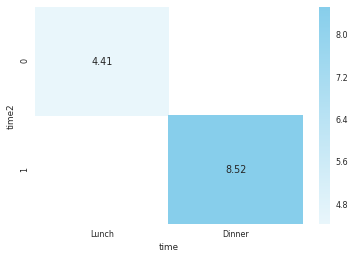

In [47]:
sns.heatmap(LD/LDt*100, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt=".2f")
plt.show()